# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 30.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


## Importing Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Loading Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* shape of the DataFrames
*  rows and columns they have
* column names
*  cleaning any NaN values or duplicates

In [5]:
df_fatalities.shape

(2535, 14)

In [6]:
df_share_race_city.shape

(29268, 7)

In [7]:
df_pct_completed_hs.shape

(29329, 3)

In [8]:
df_pct_poverty.shape

(29329, 3)

In [9]:
df_hh_income.shape

(29322, 3)

In [10]:
df_fatalities.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [11]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [12]:
df_fatalities.isna().values.any()
df_fatalities.isna().sum().sum()

346

In [13]:
df_fatalities.fillna(0, inplace=True)

In [14]:
df_fatalities.isna().values.any()
df_fatalities.isna().sum().sum()

0

In [15]:
duplicated_rows = df_fatalities[df_fatalities.duplicated()]
print(duplicated_rows.shape)
duplicated_rows.head()

(0, 14)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera


# Charting the Poverty Rate in each US State



In [ ]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'],errors='coerce')
df_pct_poverty.info()



In [ ]:
poverty_Rate= df_pct_poverty.groupby((['Geographic Area']), as_index=False).agg({'poverty_rate': pd.Series.sum})
poverty_Rate

In [53]:
bar = px.bar(poverty_Rate ,
             x = poverty_Rate['Geographic Area'],
             y = poverty_Rate.poverty_rate,
             title='High School Graduation Rate by US State',
             color=poverty_Rate.poverty_rate,
             color_continuous_scale='Aggrnyl')


bar.update_layout(xaxis_title='State',
                  yaxis_title='poverty rate')


bar.show()

# Charting the High School Graduation Rate by US State



In [ ]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'],errors='coerce')
df_pct_completed_hs.info()

In [ ]:
Graduation_Rate= df_pct_completed_hs.groupby((['Geographic Area']), as_index=False).agg({'percent_completed_hs': pd.Series.sum})
Graduation_Rate


In [47]:
bar = px.bar(Graduation_Rate ,
             x = Graduation_Rate['Geographic Area'],
             y = Graduation_Rate.percent_completed_hs,
             title='High School Graduation Rate by US State',
             color=Graduation_Rate.percent_completed_hs,
             color_continuous_scale='Aggrnyl')


bar.update_layout(xaxis_title='State',
                  yaxis_title='Graduation Rate')


bar.show()

# Visualising the Relationship between Poverty Rates and High School Graduation Rates



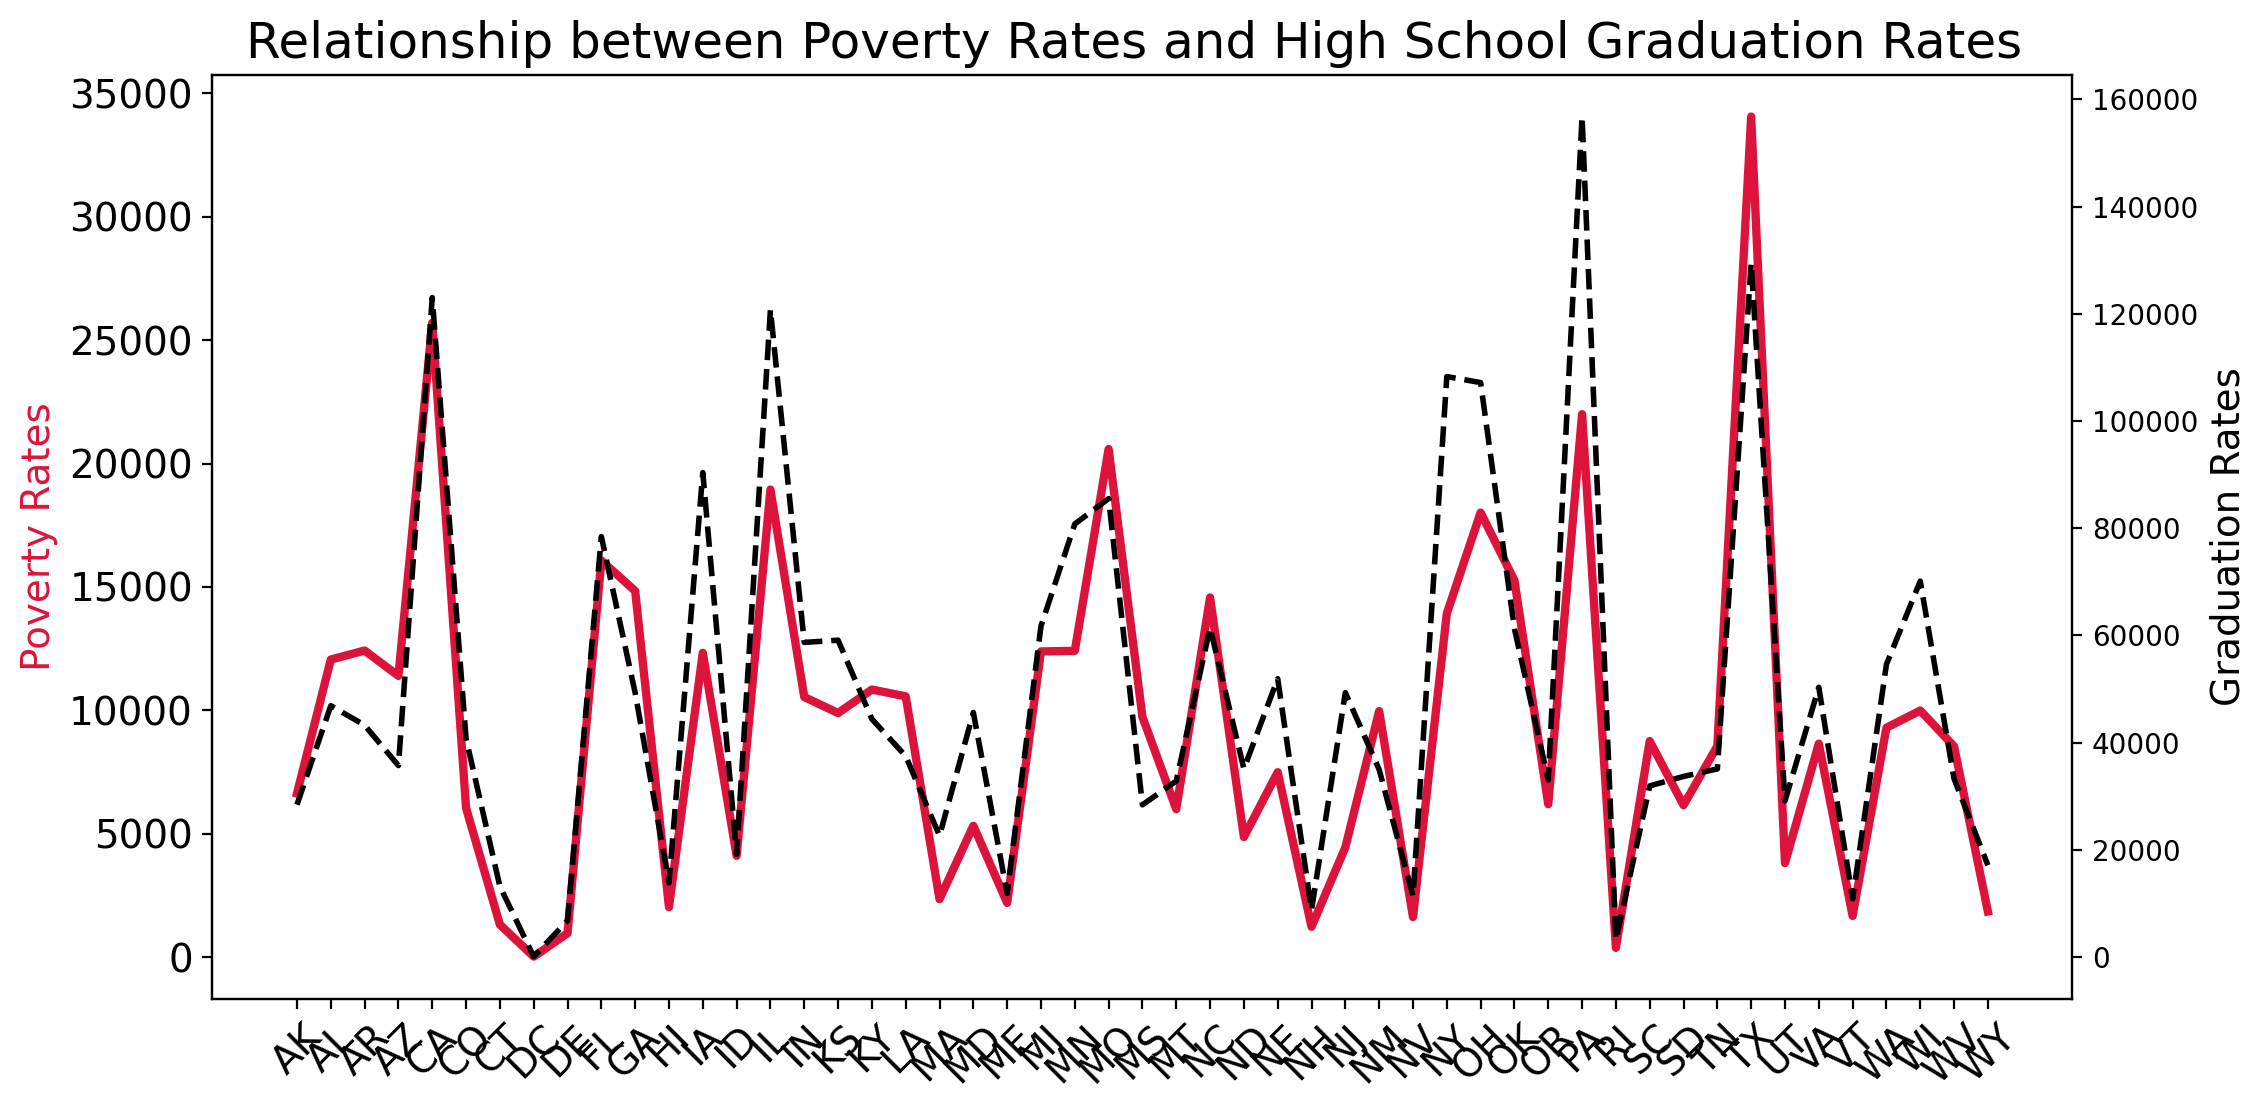

In [54]:
plt.figure(figsize=(12,6), dpi=200)

plt.title('Relationship between Poverty Rates and High School Graduation Rates ', fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14,
           rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Poverty Rates', color='crimson', fontsize=14)
ax2.set_ylabel('Graduation Rates', color='black', fontsize=14)


ax1.plot(poverty_Rate['Geographic Area'],
        poverty_Rate.poverty_rate,
        c='crimson',
        linewidth=3,)

ax2.plot(Graduation_Rate['Geographic Area'],
       Graduation_Rate.percent_completed_hs,
        c='black',
        linewidth=2,
        linestyle='--')

plt.show()

####  Using a Seaborn .jointplot() with scatter plot to visualise the same relationship

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Relationship between Poverty Rates and High School Graduation Rates ', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14,
           rotation=45)

ax = plt.gca()



ax.scatter(poverty_Rate['Geographic Area'],
            poverty_Rate.poverty_rate,
            c='dodgerblue',
            alpha=0.7,
            s=100,)

ax.plot(Graduation_Rate['Geographic Area'],
        Graduation_Rate.percent_completed_hs,
         c='black',
         linewidth=2,
        )



plt.show()


#### Using Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

In [ ]:

result = pd.merge(Graduation_Rate, poverty_Rate, on="Geographic Area")
result

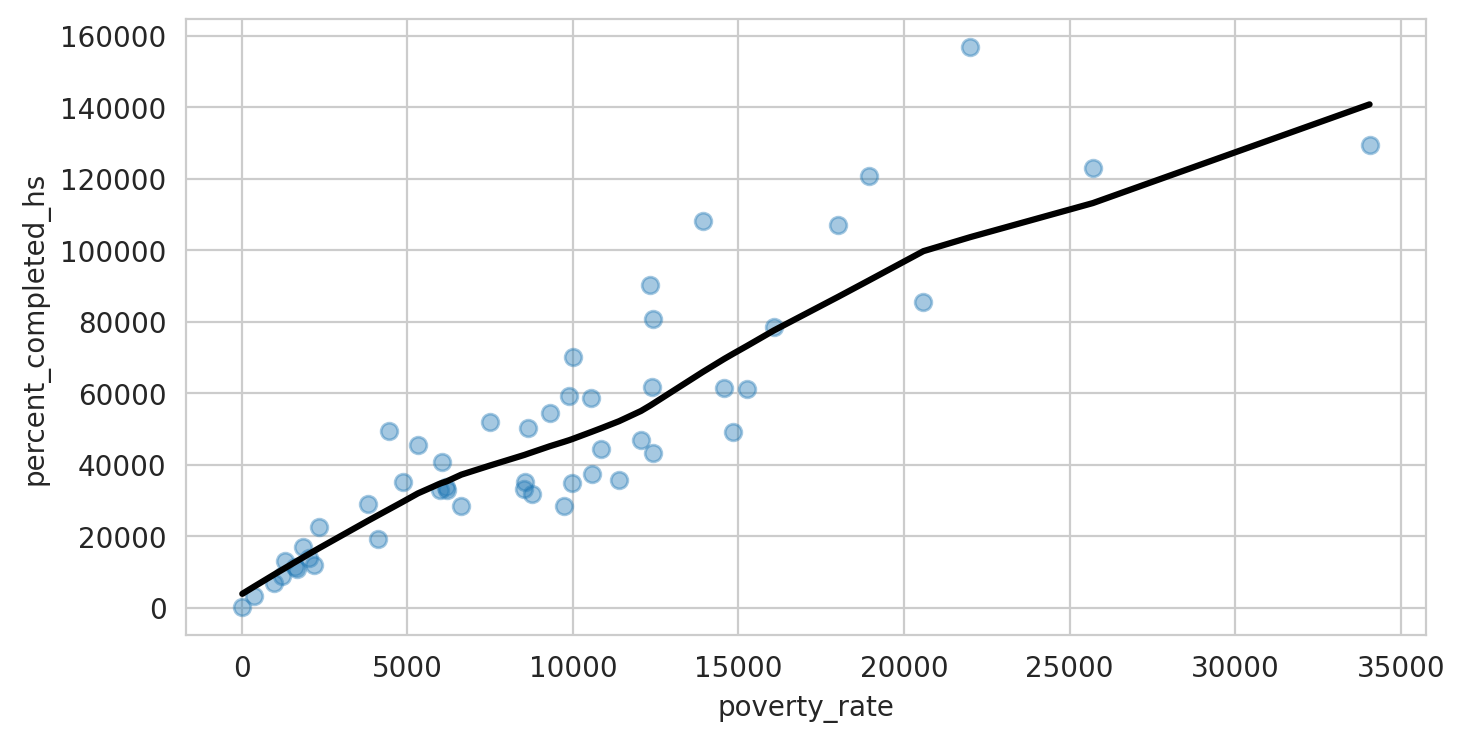

In [69]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=result,
                x='poverty_rate',
                y='percent_completed_hs',
                lowess=True,
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})

plt.show()

In [114]:
df_share_race_city


,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.20,30.20,0.00,0.00,1.60
1,AL,Abbeville city,54.40,41.40,0.10,1.00,3.10
2,AL,Adamsville city,52.30,44.90,0.50,0.30,2.30
3,AL,Addison town,99.10,0.10,0.00,0.10,0.40
4,AL,Akron town,13.20,86.50,0.00,0.00,0.30
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.90,0.00,0.00,2.10,0.00
29264,WY,Worland city,89.90,0.30,1.30,0.60,16.60
29265,WY,Wright town,94.50,0.10,1.40,0.20,6.20
29266,WY,Yoder town,97.40,0.00,0.00,0.00,4.00


In [80]:
races=(['share_white'],	['share_black']	,['share_native_american']	,['share_asian'],	['share_hispanic'])

df_share_race_city['share_white'] = pd.to_numeric(df_share_race_city['share_white'],errors='coerce')
df_share_race_city['share_black'] = pd.to_numeric(df_share_race_city['share_black'],errors='coerce')
df_share_race_city['share_native_american'] = pd.to_numeric(df_share_race_city['share_native_american'],errors='coerce')
df_share_race_city['share_asian'] = pd.to_numeric(df_share_race_city['share_asian'],errors='coerce')
df_share_race_city['share_hispanic'] = pd.to_numeric(df_share_race_city['share_hispanic'],errors='coerce')
df_share_race_city.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29248 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [85]:
race_Rate= df_share_race_city.groupby((['Geographic area']), as_index=False)
race_Rate.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.20,30.20,0.00,0.00,1.60
1,AL,Abbeville city,54.40,41.40,0.10,1.00,3.10
2,AL,Adamsville city,52.30,44.90,0.50,0.30,2.30
3,AL,Addison town,99.10,0.10,0.00,0.10,0.40
4,AL,Akron town,13.20,86.50,0.00,0.00,0.30
...,...,...,...,...,...,...,...
29065,WY,Afton town,94.10,0.20,0.70,0.20,4.20
29066,WY,Albany CDP,96.40,0.00,0.00,1.80,0.00
29067,WY,Albin town,93.90,0.00,0.60,0.60,34.30
29068,WY,Alcova CDP,90.80,0.00,0.00,0.00,11.80


# Creating Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [109]:
killed_races_per_country = df_share_race_city['Geographic area'].value_counts()
killed_races_per_country

PA    1764
TX    1752
CA    1523
IL    1367
OH    1204
NY    1189
MO    1032
IA    1009
FL     920
MN     906
WI     773
NC     739
OK     733
MI     692
IN     682
KS     671
WA     628
GA     626
VA     591
NE     580
AL     578
NJ     545
AR     541
KY     525
MD     518
LA     473
CO     458
AZ     451
NM     443
TN     429
WV     401
ND     401
SC     395
SD     390
OR     377
MT     365
MS     362
AK     355
UT     326
MA     244
ID     227
WY     203
HI     151
CT     143
ME     131
NV     129
VT     119
NH      96
DE      76
RI      34
DC       1
Name: Geographic area, dtype: int64

In [ ]:
fig = px.pie(labels=killed_races_per_country.index,
             values=killed_races_per_country.values,
             title="Male vs Female Nobel laureates",
             names=killed_races_per_country.index ,
              hole=0.4,)

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

In [113]:
killed_per_race= df_share_race_city.groupby((['Geographic area']), as_index=False).sum()
t=killed_per_race.transpose()
killed_races_per_country = t.value.values_counts()
killed_races_per_country




<ipython-input-113-fc38a81fe0a2>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



AttributeError: ignored

In [108]:
fig = px.pie(labels=t,
             values=t.values,
             title="Male vs Female Nobel laureates",
             names=t.index ,
              hole=0.4,)

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

ValueError: ignored

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

Create a seperate KDE plot for each race. Is there a difference between the distributions?

# Race of People Killed

Create a chart that shows the total number of people killed by race.

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

# Number of Police Killings Over Time

